Data set Screen Time, Sleep & Stress Analysis Dataset

In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

#Cargar el data set
dataset = pd.read_csv("dataset.csv")
dataset

#Hay 50400 filas y 13 columnas.



,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4.0,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1.0,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4.0,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3.0,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3.0,37,5,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,U25644,53,Female,Freelancer,iOS,2.5,7.1,4,7.0,1.0,11,1,10.6
50396,U16479,27,Other,Student,iOS,2.2,0.7,3,4.2,1.0,45,4,8.4
50397,U42757,26,Female,Freelancer,iOS,8.1,3.6,3,7.2,5.0,10,2,2.1
50398,U29790,33,Other,Student,iOS,2.2,1.2,10,7.2,2.0,33,3,11.5


In [13]:
# #Revisar si hay datos duplicados
dataset.duplicated().sum()
#Hay 397 datos duplicados.

397

In [16]:
# #B Revisar si hay datos nulos
dataset.isnull().sum()
#Hay 301 datos nulos en Sleep_Hours y 206 datos nulos en Stress_Level

User_ID                        0
Age                            0
Gender                         0
Occupation                     0
Device_Type                    0
Daily_Phone_Hours              0
Social_Media_Hours             0
Work_Productivity_Score        0
Sleep_Hours                  301
Stress_Level                 206
App_Usage_Count                0
Caffeine_Intake_Cups           0
Weekend_Screen_Time_Hours      0
dtype: int64

In [ ]:
# #Revisar si hay inconsistencias
dataset.describe(include="all")
#Hay algo de inconsistencias en los datos

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
count,50400,50400.000000,50400,50400,50400,50400.000000,50400.000000,50400.000000,50099.000000,50194.000000,50400.000000,50400.000000,50400.000000
unique,50000,NaN,3,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,U48722,NaN,Male,Professional,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,16839,12729,25277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.029583,NaN,NaN,NaN,6.533690,4.267323,5.503254,6.515074,5.505200,32.441151,3.004841,8.010137
std,NaN,12.415242,NaN,NaN,NaN,3.255406,2.165157,2.874290,1.561764,2.870716,16.120561,1.996569,3.461126
min,NaN,18.000000,NaN,NaN,NaN,1.000000,0.500000,1.000000,4.000000,1.000000,5.000000,0.000000,2.000000
25%,NaN,28.000000,NaN,NaN,NaN,3.800000,2.400000,3.000000,5.200000,3.000000,18.000000,1.000000,5.000000
50%,NaN,39.000000,NaN,NaN,NaN,6.500000,4.300000,5.000000,6.500000,6.000000,32.000000,3.000000,8.000000
75%,NaN,50.000000,NaN,NaN,NaN,9.200000,6.100000,8.000000,7.800000,8.000000,46.000000,5.000000,11.000000


In [18]:
# #Punto C.
dataset.dtypes

User_ID                       object
Age                            int64
Gender                        object
Occupation                    object
Device_Type                   object
Daily_Phone_Hours            float64
Social_Media_Hours           float64
Work_Productivity_Score        int64
Sleep_Hours                  float64
Stress_Level                 float64
App_Usage_Count                int64
Caffeine_Intake_Cups           int64
Weekend_Screen_Time_Hours    float64
dtype: object

In [19]:


columnas_numericas = dataset.select_dtypes(include=["int64", "float64"]).columns
for col in columnas_numericas:
    conversion = pd.to_numeric(dataset[col], errors="coerce")
    errores = conversion.isna().sum() - dataset[col].isna().sum()
    print(col, "valores no numericos: ", errores)

# #Se realizó una validación de consistencia en columnas numéricas 
# # mediante conversión forzada a formato numérico. No se detectaron valores no 
# # numéricos ocultos, confirmando la integridad del dataset.

Age valores no numericos:  0
Daily_Phone_Hours valores no numericos:  0
Social_Media_Hours valores no numericos:  0
Work_Productivity_Score valores no numericos:  0
Sleep_Hours valores no numericos:  0
Stress_Level valores no numericos:  0
App_Usage_Count valores no numericos:  0
Caffeine_Intake_Cups valores no numericos:  0
Weekend_Screen_Time_Hours valores no numericos:  0


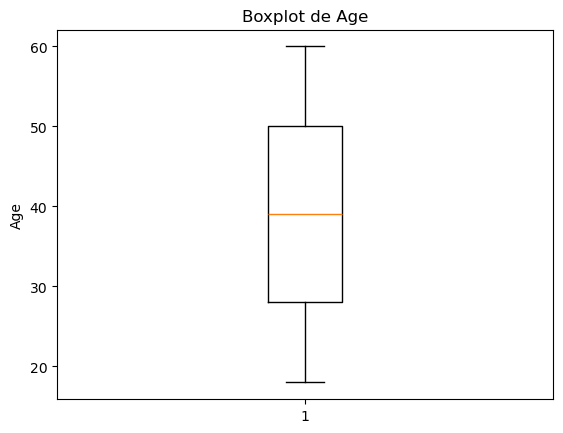

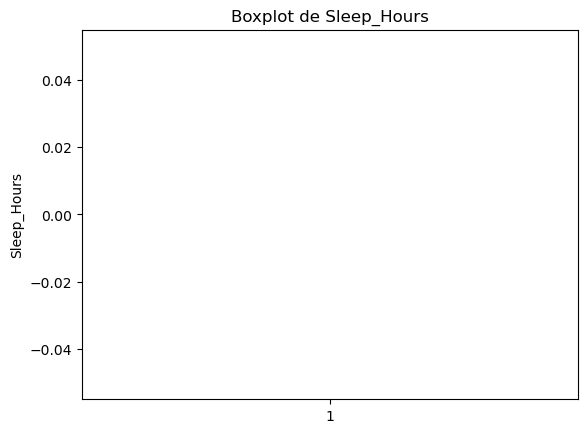

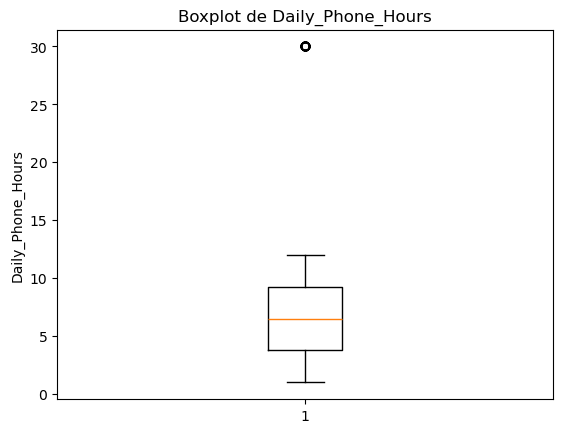

count    50400.000000
mean         0.190817
std          0.112255
min          0.000000
25%          0.096552
50%          0.189655
75%          0.282759
max          1.000000
Name: Daily_Phone_Hours_Normalized, dtype: float64

In [20]:



#D

columnas = ["Age", "Sleep_Hours", "Daily_Phone_Hours"]

for col in columnas:
    plt.figure()
    plt.boxplot(dataset[col])
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()


#E
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset["Daily_Phone_Hours_Normalized"] = scaler.fit_transform(dataset[["Daily_Phone_Hours"]])
dataset["Daily_Phone_Hours_Normalized"].describe()